In [3]:
#I - Importing libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [5]:
#II - Importing dataset

db1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
db2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
db3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
db4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [6]:
#let's make one dataset by combining the other 3.

db = pd.concat([db1, db2, db3, db4], ignore_index=False, axis=0)

In [7]:
#III - Data Visualization

db.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1.82938e+06,2001.0,08/29/2006 03:46:28 AM,41.687,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1.84483e+06,2003.0,04/15/2016 08:55:02 AM,41.7297,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1.89576e+06,2003.0,04/15/2016 08:55:02 AM,41.8698,-87.708180,"(41.869772159, -87.708180162)"


In [9]:
db.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1.86899e+06,2016.0,05/10/2016 03:56:50 PM,41.7964,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1.83528e+06,2016.0,05/10/2016 03:56:50 PM,41.7027,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1.85707e+06,2016.0,05/10/2016 03:56:50 PM,41.7635,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1.84811e+06,2016.0,05/10/2016 03:56:50 PM,41.7387,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1.84613e+06,2016.0,05/10/2016 03:56:50 PM,41.7333,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1.8883e+06,2016.0,05/10/2016 03:56:50 PM,41.8492,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1.85618e+06,2016.0,05/10/2016 03:56:50 PM,41.7607,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1.86281e+06,2016.0,05/10/2016 03:56:50 PM,41.7792,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1.85073e+06,2016.0,05/10/2016 03:56:50 PM,41.7453,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1.85532e+06,2016.0,05/10/2016 03:56:50 PM,41.7583,-87.620658,"(41.75830866, -87.620658418)"


In [10]:
#lets drop the columns which are not useful.

db.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [11]:
db.head(5)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [13]:
db

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [14]:
db.tail(5)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1456709,10508679,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,10508680,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,10508681,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,10508690,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
1456713,10508692,05/03/2016 11:38:00 PM,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


In [15]:
# Assembling a datetime by rearranging the dataframe column "Date". 

db.Date = pd.to_datetime(db.Date, format='%m/%d/%Y %I:%M:%S %p')

In [17]:
db.head(5)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [18]:
db.shape

(7941282, 8)

In [20]:
# let the date column be the index column.

db.index = pd.DatetimeIndex(db.Date)

In [21]:
db

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [24]:
db['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [25]:
db['Primary Type'].value_counts().iloc[:20]

THEFT                               1640506
BATTERY                             1442716
CRIMINAL DAMAGE                      923000
NARCOTICS                            885431
OTHER OFFENSE                        491922
ASSAULT                              481661
BURGLARY                             470958
MOTOR VEHICLE THEFT                  370548
ROBBERY                              300453
DECEPTIVE PRACTICE                   280931
CRIMINAL TRESPASS                    229366
PROSTITUTION                          86401
WEAPONS VIOLATION                     77429
PUBLIC PEACE VIOLATION                58548
OFFENSE INVOLVING CHILDREN            51441
CRIM SEXUAL ASSAULT                   29868
SEX OFFENSE                           28707
GAMBLING                              18806
LIQUOR LAW VIOLATION                  17513
INTERFERENCE WITH PUBLIC OFFICER      15710
Name: Primary Type, dtype: int64

In [26]:
db['Primary Type'].value_counts().index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'GAMBLING', 'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'ARSON', 'HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING',
       'OBSCENITY', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'RITUALISM', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'DOMESTIC VIOLENCE'],
      dtype='object')

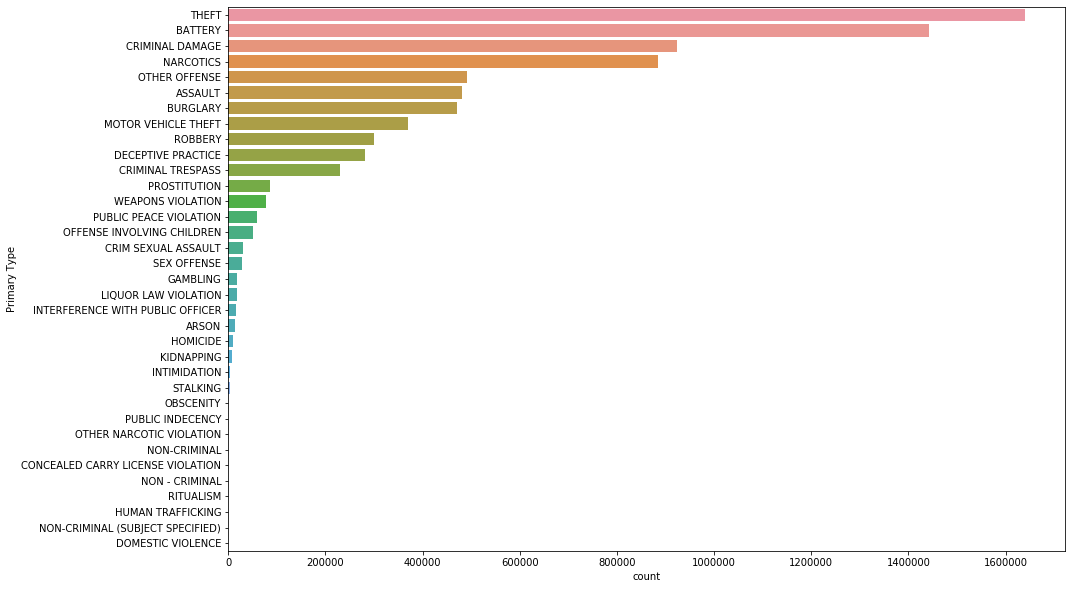

In [28]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = db, order = db['Primary Type'].value_counts().index)

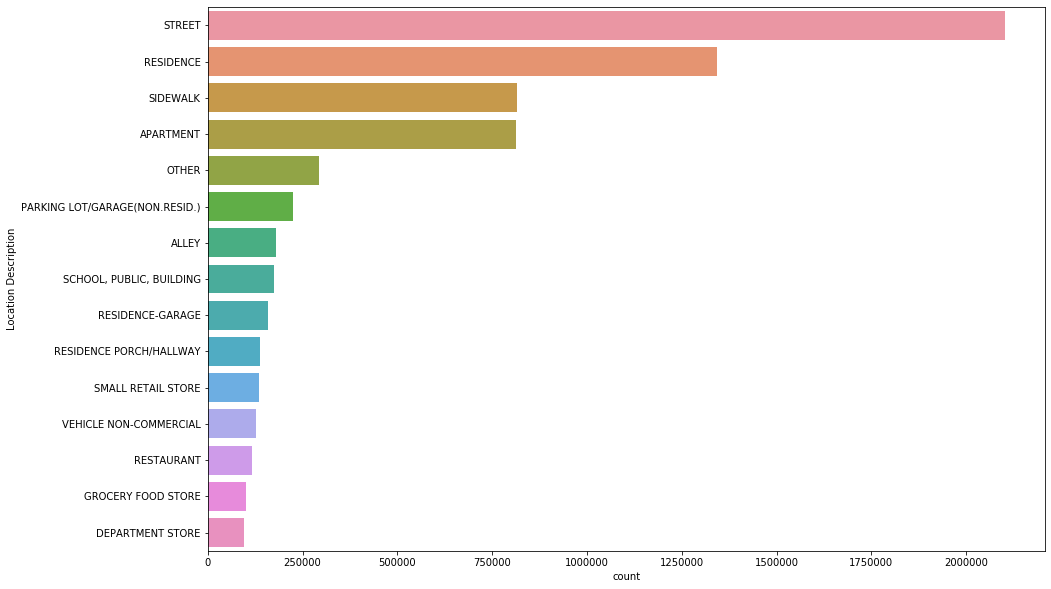

In [30]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = db, order = db['Location Description'].value_counts().iloc[:15].index)

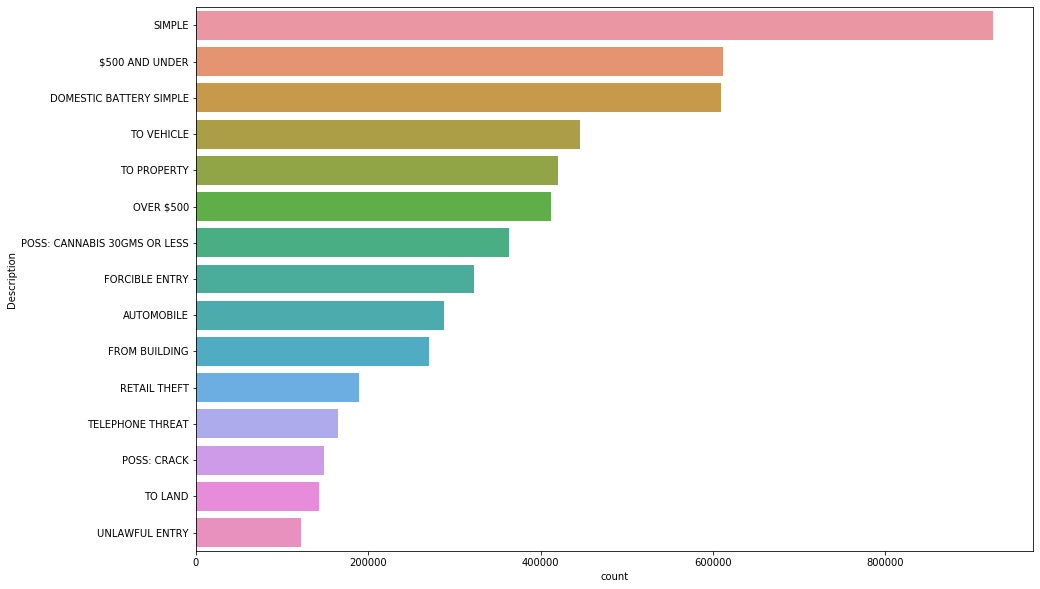

In [32]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Description', data = db, order = db['Description'].value_counts().iloc[:15].index)

In [34]:
#let's see year wise crimes

db.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Total number of crimes')

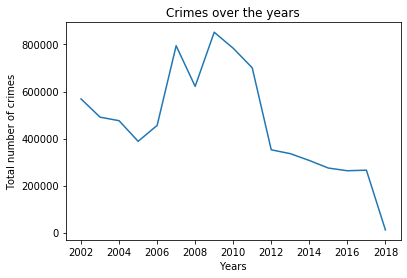

In [36]:
#Visualise the above results

plt.plot(db.resample('Y').size())
plt.title("Crimes over the years")
plt.xlabel('Years')
plt.ylabel('Total number of crimes')

In [38]:
#this is the month wise crime statistics

db.resample('M').size()

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

Text(0, 0.5, 'Number of Crimes')

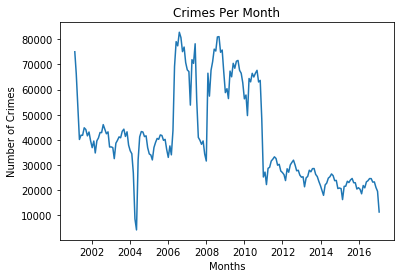

In [39]:
# Visualising the above monthly statistics.

plt.plot(db.resample('M').size())
plt.title('Crimes Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [41]:
#Quarterly crime statistics

db.resample('Q').size()

Date
2001-03-31    194405
2001-06-30    123865
2001-09-30    130518
2001-12-31    119730
2002-03-31    113998
               ...  
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-31     64034
2017-03-31     11357
Freq: Q-DEC, Length: 65, dtype: int64

Text(0, 0.5, 'Number of Crimes')

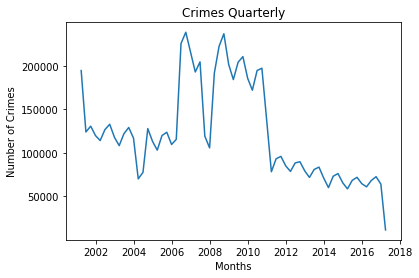

In [42]:
#Visualising the quarterly statistics

plt.plot(db.resample('Q').size())
plt.title('Crimes Quarterly')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [44]:
#IV - Preparing of the Data

db_series = db.resample('M').size().reset_index()

In [45]:
db_series

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [46]:
db_series.columns = ['Date', 'Total Crimes']

In [47]:
db_series

,Date,Total Crimes
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [48]:
db_series_df = pd.DataFrame(db_series)

In [49]:
db_series_df

,Date,Total Crimes
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [51]:
#V - Making Predictions

db_series_df.columns

Index(['Date', 'Total Crimes'], dtype='object')

In [52]:
db_series_df = db_series_df.rename(columns={'Date':'ds', 'Total Crimes':'y'})

In [53]:
db_series_df

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [55]:
m = Prophet()
m.fit(db_series_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
#Forecasting the Future

future = m.make_future_dataframe(periods=1095)
forecast = m.predict(future)

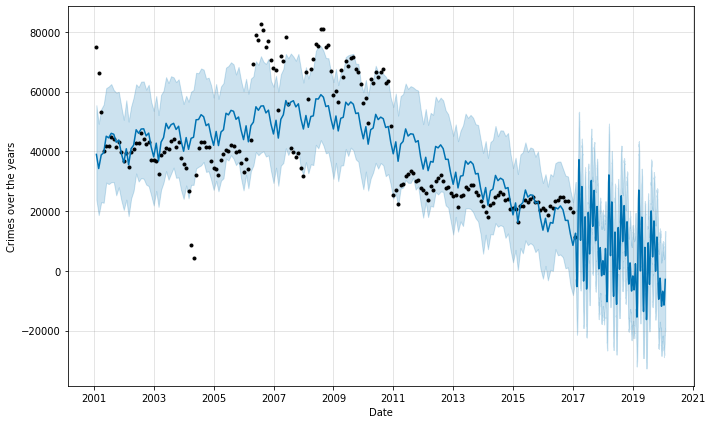

In [62]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crimes over the years')

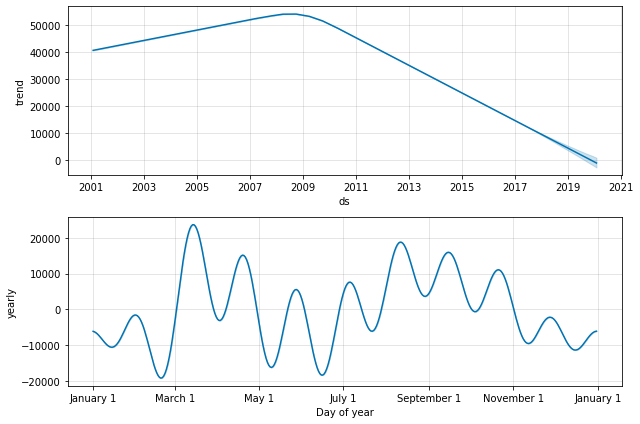

In [63]:
figure1 = m.plot_components(forecast)